# <center> Clustering Project <center/>
<center> DLBDSMLUSL01 - Machine Learning : Unsupervised Learning <center/>
<center> IU International University of Applied Sciences <center/>

# Greetings
Human Resources of our company would like to mitigate mental health issues among the company’s staff through a pre-emptive program. This program will be based on this quantitative analysis of [data](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016/) resulting from anonymous surveys from people working in IT-related companies around the world.

### List of contents :
1. __Introduction__
2. __Exploratory Data Analysis (EDA)__
3. _Data Pre-processing_
4. _Feature Encoding_
5. _Dimensionality Reduction_
6. _Clustering_
7. _Clusters Profiling_
8. _Summary_

Importing the required libraries

In [1]:
# Tools from sklearn frameworks
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# from yellowbrick.cluster.elbow import KElbowVisualizer #
# from prince import MCA #
# from umap import UMAP # 
from pathlib import Path  # Path library for generating OS paths efficiently
import warnings # Handle warnings
import pandas as pd  # Data analysis library
import numpy as np  # Python library for numerical computation 
import matplotlib.pyplot as plt  # The base library for plotting graphs in python
import textwrap # For wrapping and filling texts
import seaborn as sns  # Powerful data visualization library

In [2]:
# Ignoring irrelevant warnings
warnings.filterwarnings('ignore')

## 1. Introduction
First, let's start by loading the data. 

In [3]:
# Formulating the directory 
path = Path.cwd().parent

# Loading the data
df = pd.read_csv(f'{path}/data/mental-heath-in-tech-2016_20161114.csv')

# Printing the first 10 rows
df.head(10)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,0,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
6,0,26-100,1.0,NaN,I don't know,No,No,No,I don't know,Somewhat easy,...,Not applicable to me,Not applicable to me,30,M,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes
7,0,More than 1000,1.0,NaN,Yes,Yes,No,Yes,Yes,Very easy,...,Sometimes,Often,37,female,United States of America,Virginia,United States of America,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always
8,0,26-100,0.0,1.0,I don't know,No,No,No,I don't know,Very difficult,...,Rarely,Often,44,Female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rarely,Often,30,Male,United States of America,Kentucky,United States of America,Kentucky,One-person shop|Front-end Developer|Back-end D...,Always


In [4]:
print(f"The data is formed through {df.shape[1]} columns/features and {df.shape[0]} rows/records.")

The data is formed through 63 columns/features and 1433 rows/records.


In [5]:
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


As we seek further investigations, we might use the __".info()"__ method, but we want to need to explore unique values within each column as this information will help us later on.

In [6]:
# Initiating an empty list data_info 
data_info = []

# Gathering the attributes in one place 
for index, column in enumerate(df.columns):
    info = {
        'name': column,  # The name of the column 

        'empty_values': df[column].isna().sum(),  # The number of empty values in a column

        # The number and list of unique values 
        'unique_values_count':
            [df[column].unique().__len__() - 1 if df[column].isna().sum() != 0 else df[column].unique().__len__()][0],
        'unique_values_list': [list(set(df[column])) if df[column].unique().__len__() != 1 else "None"][0],

        'data_type': df[column].dtypes  # The data type of column
    }

    # Appending the values  
    data_info.append(info)

# Create a DataFrame from the gathered information
null_categories_data = pd.DataFrame(data_info).sort_values(by=['unique_values_count'], ascending=False)

# Taking off the nan element of the unique values list
for element in null_categories_data["unique_values_list"].to_list():
    if np.nan in element:
        element.remove(np.nan)
    elif "nan" in element:
        element.remove("nan")

# Printing the first 10 rows
null_categories_data

,name,empty_values,unique_values_count,unique_values_list,data_type
37,Why or why not?,338,1085,[That should not be a deciding factor when the...,object
39,Why or why not?.1,307,1080,"[depends on the person, If I do is depending o...",object
61,Which of the following best describes your wor...,0,264,[One-person shop|Back-end Developer|Sales|Supp...,object
48,"If yes, what condition(s) have you been diagno...",865,128,"[Mood Disorder (Depression, Bipolar Disorder, ...",object
51,"If so, what condition(s) were you diagnosed with?",722,116,[Attention Deficit Hyperactivity Disorder|MCD ...,object
...,...,...,...,...,...
16,Do you have medical coverage (private insuranc...,1146,2,"[0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, ...",float64
24,Do you have previous employers?,0,2,"[0, 1]",int64
3,Is your primary role within your company relat...,1170,2,"[0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, ...",float64
2,Is your employer primarily a tech company/orga...,287,2,"[0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, ...",float64


__Insights :__
- Out of a total of 63 columns, 7 columns contain numerical data while 15 columns contain more than 500 missing entries. 
- Unusual entries within columns such as _age_ and _gender_ were identified, necessitating an appropriate filling approach.
- Large numbers of unique values necessitate grouping into finite categories.
- Long columns names in the form of questions can benefit from a transformation into short columns names.

## 2. Exploratory Data Analysis
In this section, we're iterating over columns based on relevancy. For a clearer view, visualizations are used where appropriate.

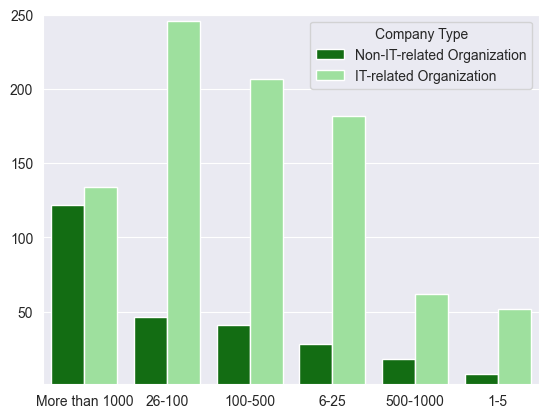

In [7]:
# Setting the dataframe of information
frame = pd.DataFrame(df.groupby("Is your employer primarily a tech company/organization?")["How many employees does your company or organization have?"].value_counts()).reset_index()

# Renaming its columns 
frame.columns = ["is_tech_company", "organization_size", "number_of_employees"]

# Adjusting variables
frame["is_tech_company"].replace(0.0, "Non-IT-related Organization", inplace=True)
frame["is_tech_company"].replace(1.0, "IT-related Organization", inplace=True)

# Generating the plot
sns.barplot(x="organization_size", y="number_of_employees", hue="is_tech_company", data=frame,
            palette={"IT-related Organization": "lightgreen", "Non-IT-related Organization": "green"}, saturation=0.7)

# Setting labels
plt.xlabel('')
plt.ylabel('')

# Setting y-axis to omit 1 and limit at 250
plt.ylim(1, 250)

# Show legend
plt.legend(title='Company Type', loc='upper right')

# Save the figure
plt.savefig(f"{path}/assets/Fig1.png")

# Showing the plot
plt.show()

In the following section, a comparison is provided of current and previous employers regarding the following areas :
1. Availability of Mental Health Benefits in Healthcare Coverage.
2. Knowledge of Mental Health Care Options Under Employer-Provided Coverage.
3. Formal Discussions on Mental Health in the Workplace.
4. Availability of Resources for Mental Health Concerns.
5. Anonymity Protection for Mental Health or Substance Abuse Treatment.
6. Potential Negative Consequences of Discussing Mental Health Disorders with Employer.
7. Potential Negative Consequences of Discussing Physical Health Issues with Employer.
8. Comfort Level Discussing Mental Health with Coworkers.
9. Comfort Level Discussing Mental Health with Direct Supervisors.
10. Perception of Employer's Attitude Towards Mental Health vs. Physical Health.
11. Observation of Negative Consequences for Coworkers Open About Mental Health Issues.

In [8]:
# Setting lists of columns
previous_employer = [
    "Have your previous employers provided mental health benefits?",
    "Were you aware of the options for mental health care provided by your previous employers?",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?",
    "Did you feel that your previous employers took mental health as seriously as physical health?",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?"
]

current_employer = [
    "Does your employer provide mental health benefits as part of healthcare coverage?",
    "Do you know the options for mental health care available under your employer-provided coverage?",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?",
    "Do you feel that your employer takes mental health as seriously as physical health?",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?"

]

# Setting titles' list
titles = [
    "Availability of Mental Health Benefits in Healthcare Coverage",
    "Knowledge of Mental Health Care Options Under Employer-Provided Coverage",
    "Formal Discussions on Mental Health in the Workplace",
    "Availability of Resources for Mental Health Concerns",
    "Anonymity Protection for Mental Health or Substance Abuse Treatment",
    "Potential Negative Consequences of Discussing Mental Health Disorders with Employer",
    "Potential Negative Consequences of Discussing Physical Health Issues with Employer",
    "Comfort Level Discussing Mental Health with Coworkers",
    "Comfort Level Discussing Mental Health with Direct Supervisors",
    "Perception of Employer's Attitude Towards Mental Health vs. Physical Health",
    "Observation of Negative Consequences for Coworkers Open About Mental Health Issues"
]

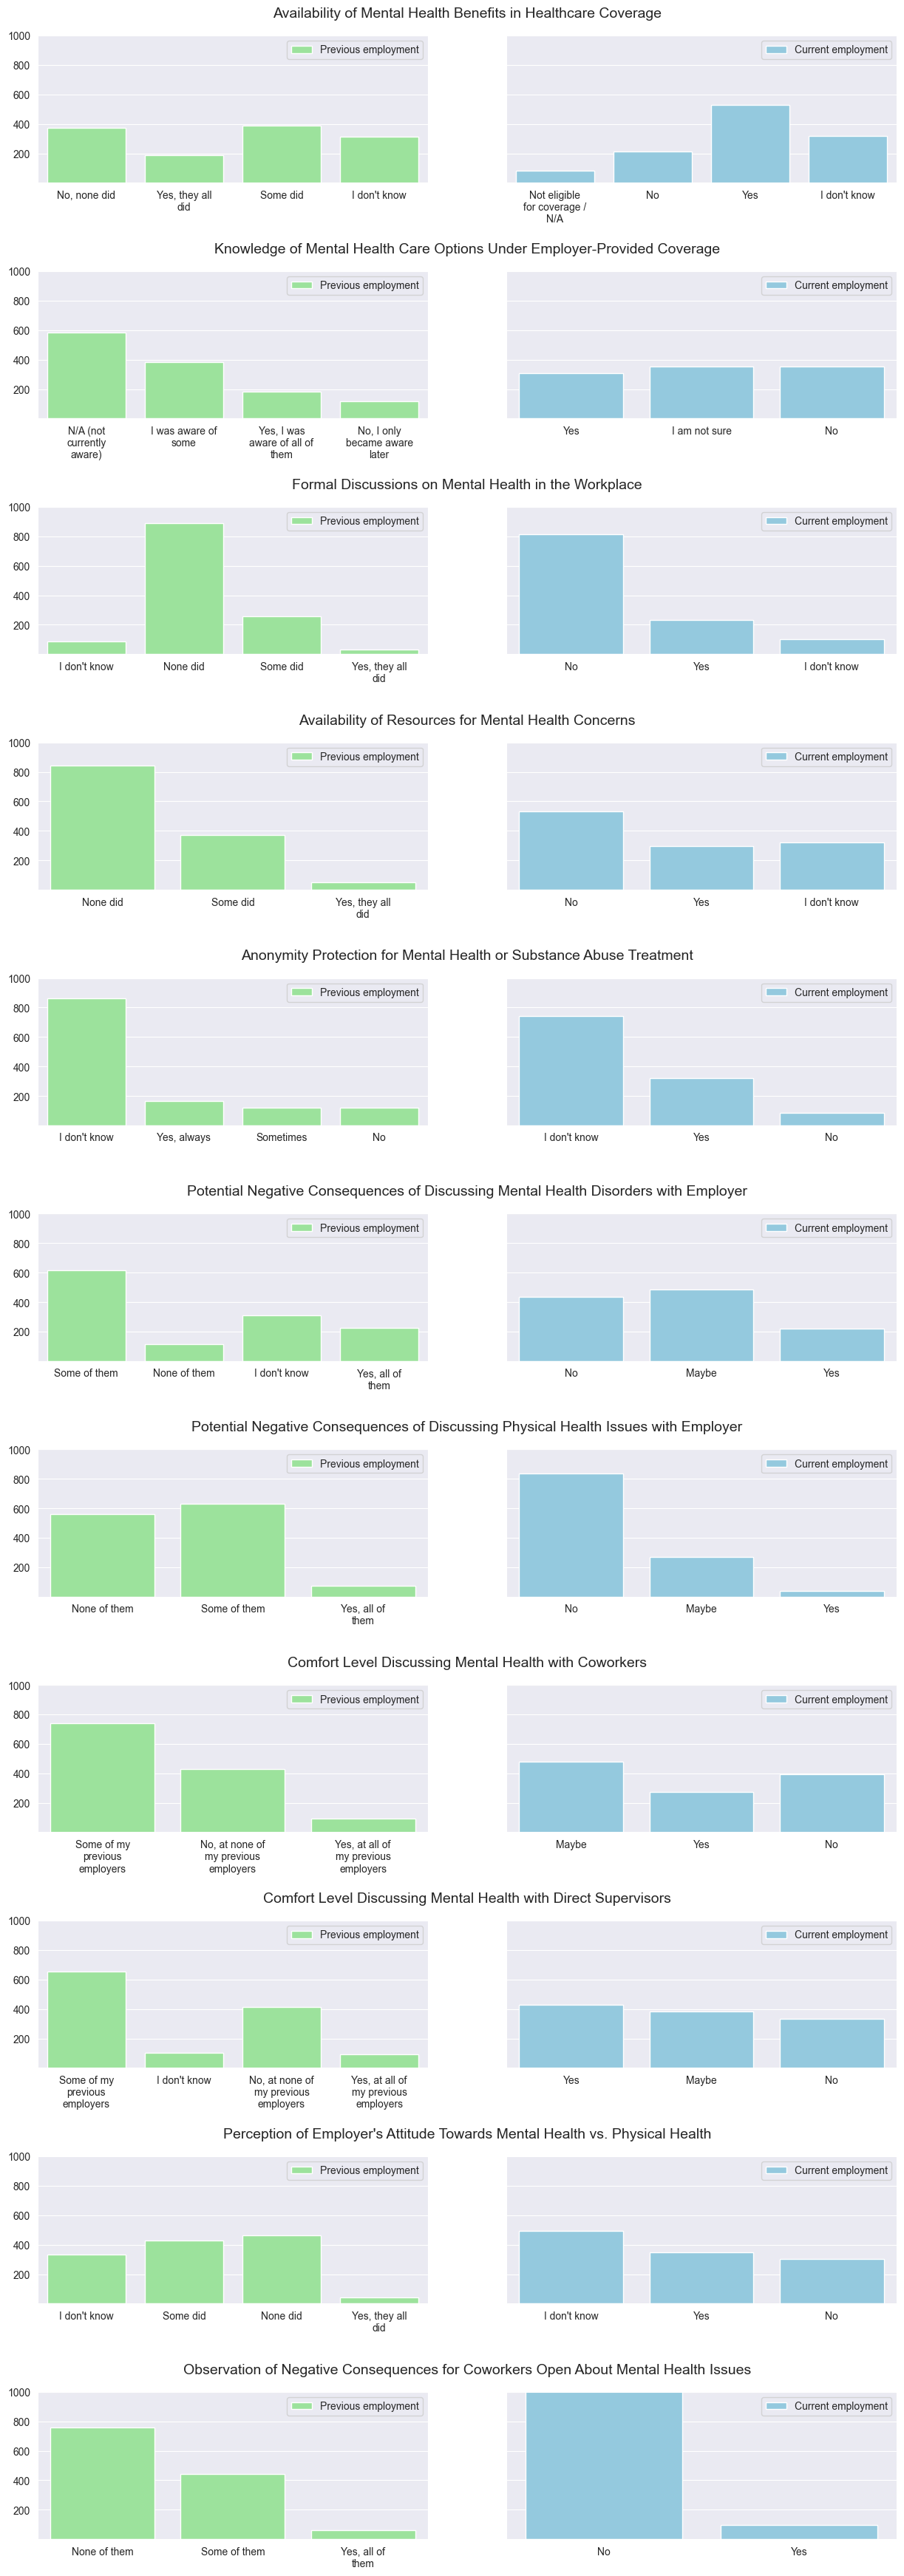

In [9]:
# Define the size of the figure and the number of rows and columns
fig, axes = plt.subplots(nrows=len(previous_employer), ncols=2, figsize=(15, 4 * len(previous_employer)), sharey=True)
plt.subplots_adjust(hspace=0.6)

# Iterate through each question in previous_employer and current_employer lists
for i in range(len(previous_employer)):
    # Plot the count plot for the previous employer question
    sns.countplot(x=previous_employer[i], data=df, ax=axes[i, 0], color='lightgreen')
    axes[i, 0].set_ylabel("")
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylim(1, 1000)
    axes[i, 0].set_xticklabels([textwrap.fill(label.get_text(), 15) for label in axes[i, 0].get_xticklabels()])
    axes[i, 0].legend(["Previous employment"], loc="upper right")

    # Plot the count plot for the current employer question
    sns.countplot(x=current_employer[i], data=df, ax=axes[i, 1], color='skyblue')
    axes[i, 1].set_ylabel("")
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylim(1, 1000)
    axes[i, 1].set_xticklabels([textwrap.fill(label.get_text(), 15) for label in axes[i, 1].get_xticklabels()])
    axes[i, 1].legend(["Current employment"], loc="upper right")


    # Set a single title above each row of graphs
    axes[i, 0].set_title(titles[i], fontsize=14, pad=18)
    axes[i, 0].title.set_position([1.1, 5])

# Saving the figure 
plt.savefig(f"{path}/assets/Fig2.png")

# Show the plot
plt.show()

Next, we explore the intention of employees to reveal physical and health issues in a job interview.

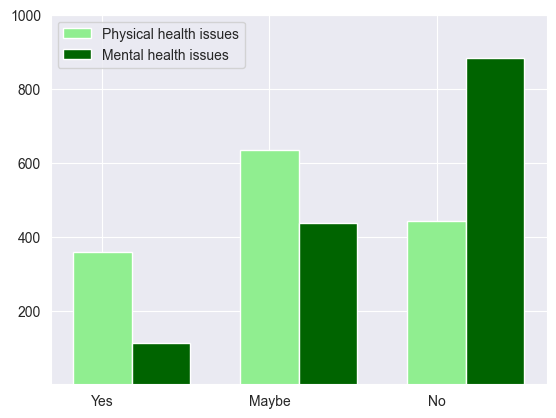

In [10]:
# Performing aggregations on the columns, then saving them into dictionaries
phi = df[
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?"].value_counts().to_dict()
mhi = df[
    "Would you bring up a mental health issue with a potential employer in an interview?"].value_counts().to_dict()

# Setting the components for the chart
categories = ['Yes', 'Maybe', 'No']
phi_values = [phi['Yes'], phi['Maybe'], phi['No']]
mhi_values = [mhi['Yes'], mhi['Maybe'], mhi['No']]

# Set the width of the bars
bar_width = 0.35

# Create figure and axis
fig, ax = plt.subplots()

# Plot the first set of bars
bar1 = ax.bar(np.arange(len(categories)), phi_values, bar_width, color='lightgreen', label='Physical health issues')

# Calculate the position for the second set of bars
bar2_position = np.arange(len(categories)) + bar_width

# Plot the second set of bars
bar2 = ax.bar(bar2_position, mhi_values, bar_width, color='darkgreen', label='Mental health issues')

# Set labels and ticks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(1, 1000)
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)

# Add legend
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax.legend(bars, labels)

# Saving the figure 
plt.savefig(f"{path}/assets/Fig3.png")

# Show plot
plt.show()

In the upcoming section, we discover how employees regard the impact of being identified with mental illnesses on their careers and status among their pairs. Then, we assess their openness to discuss it with friends and relatives.

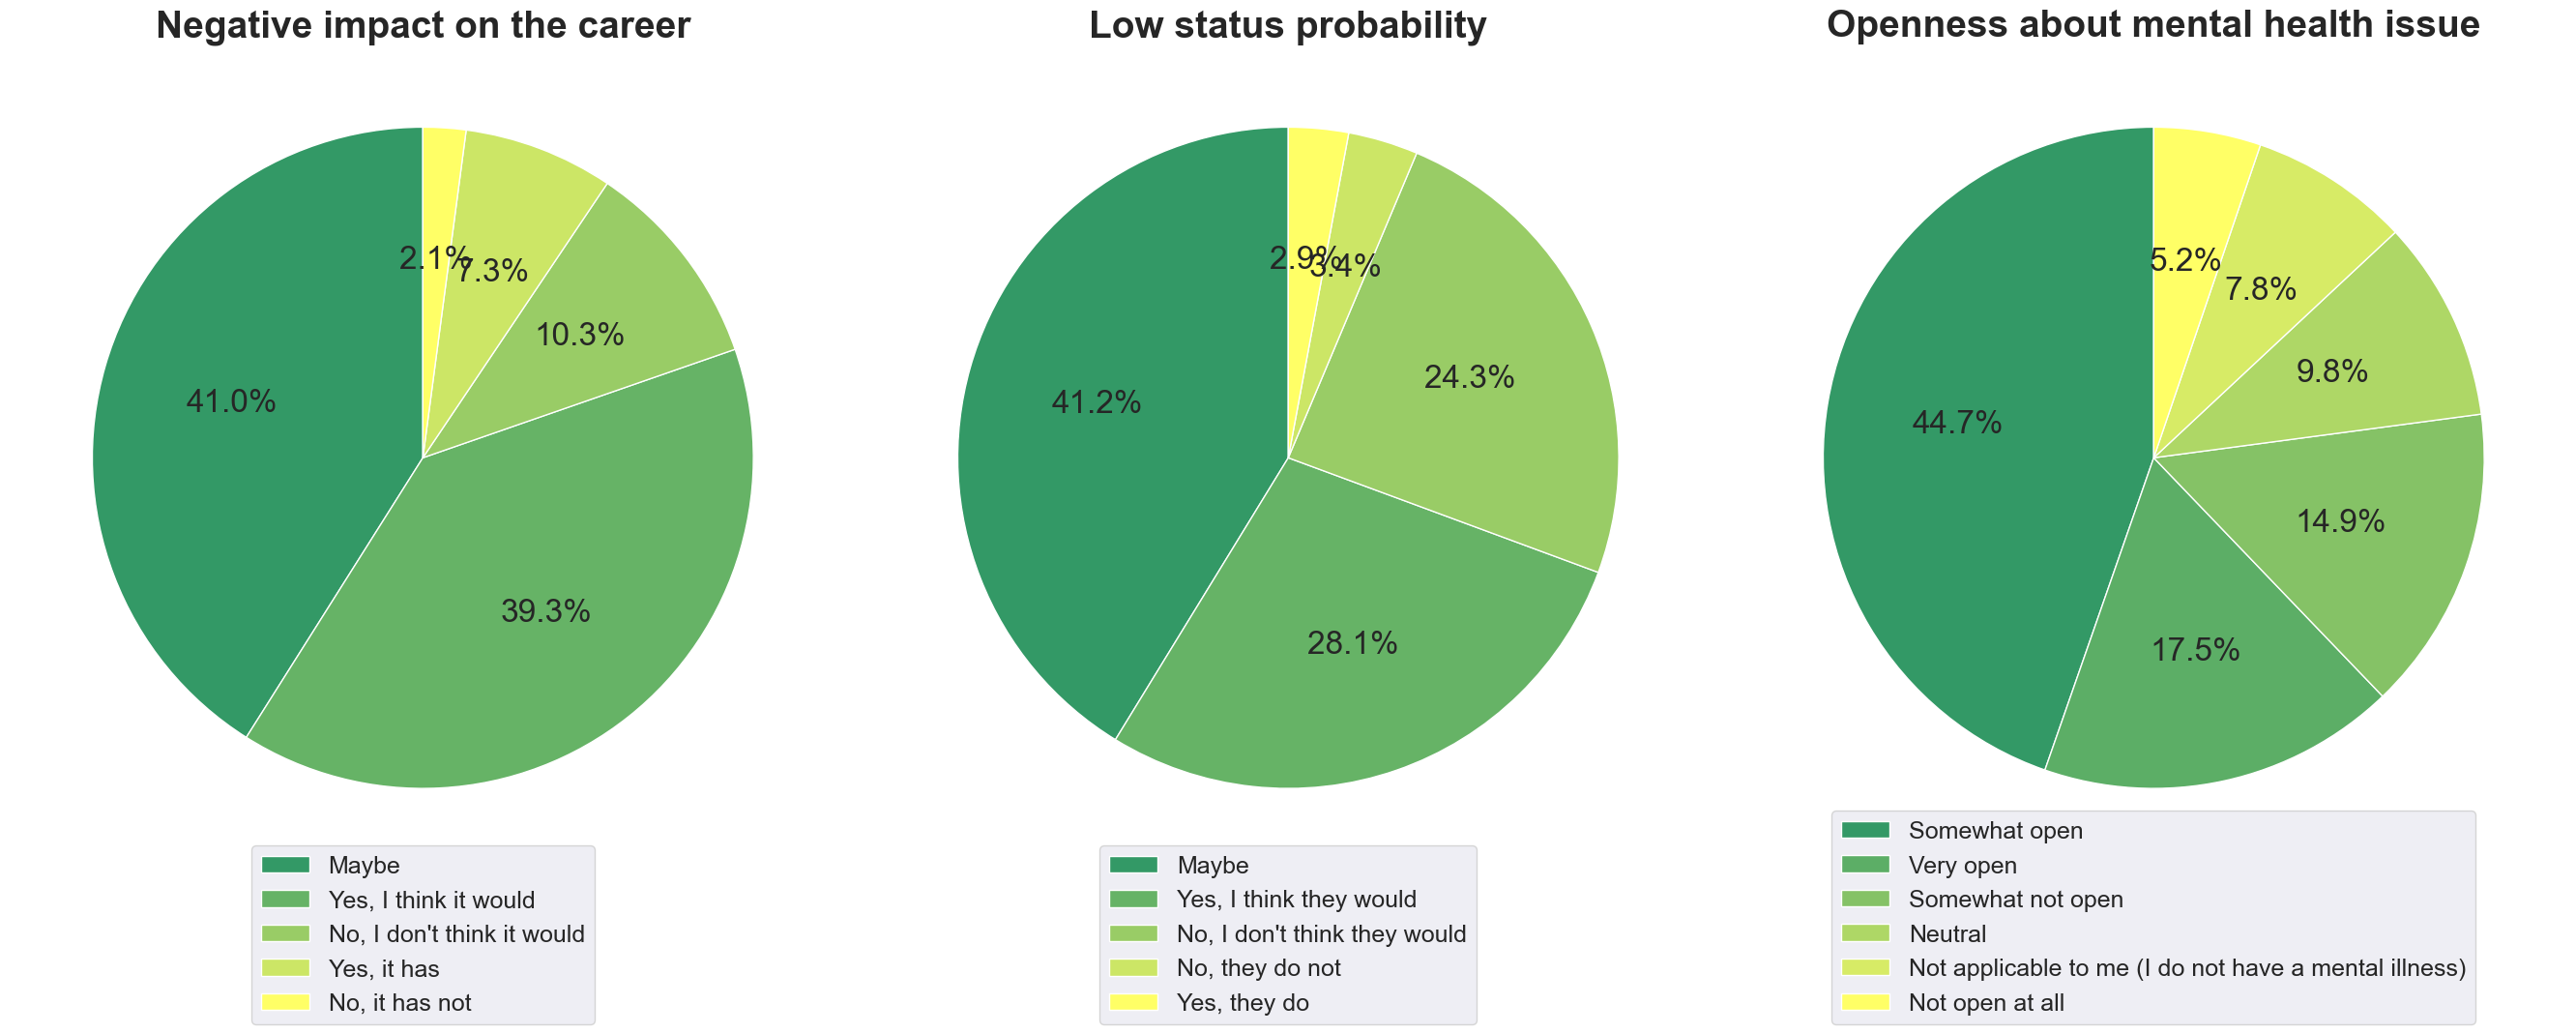

In [11]:
# Saving the columns names in a list
columns = [
    "Do you feel that being identified as a person with a mental health issue would hurt your career?",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?",
    "How willing would you be to share with friends and family that you have a mental illness?"
]

# Saving the prospected charts' titles in a list
titles = [
    "Negative impact on the career",
    "Low status probability",
    "Openness about mental health issue"
]

# Create a figure and three subplots
fig3, axes = plt.subplots(1, 3, figsize=(27, 12))

# Starting the for loop
for index, column in enumerate(columns):
    # Setting the dictionary with the relevant details
    the_dict = df[column].value_counts().to_dict()

    # Solving the categories and their values
    categories = list(the_dict.keys())
    values = [the_dict[category] for category in categories]  # Corrected

    # Plotting the chart without labels and percentages
    axes[index].pie(values, labels=None, autopct='%1.1f%%', textprops={'fontsize': 24}, startangle=90,
                    colors=plt.cm.summer(np.linspace(0.2, 1, len(categories))))
    axes[index].set_title(titles[index], fontweight='bold', fontsize=28)

    # Adding legend under each chart with extra space at the bottom
    axes[index].legend(categories, loc='lower center', bbox_to_anchor=(0.5, -0.2), fontsize=18)

# Adjust layout
plt.tight_layout()

# Saving the plot
plt.savefig(f'{path}/assets/Fig4.png')

# Show the plot
plt.show()

Fastforward, we would like to investigate whether the respondents have already experienced a badly handled mental health case, since it'd highly affect their behavior toward reporting a cose of their own.

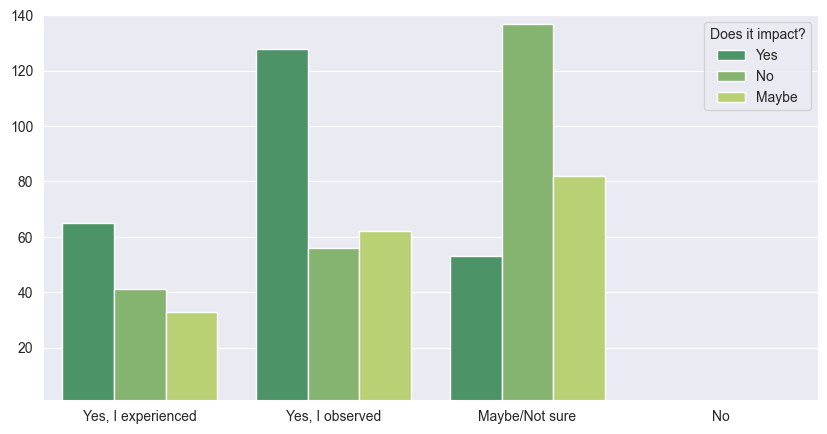

In [12]:
# Setting a subset with the two columns called new_df
new_df = df[[
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
    "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"
]].copy()

# Setting the figure size
plt.figure(figsize=(10, 5))

# Plotting the bar plot using seaborn
sns.countplot(
    x="Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
    hue="Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?",
    order=["Yes, I experienced", "Yes, I observed", "Maybe/Not sure", "No"],
    palette="summer",
    data=new_df)

# Setting labels and legend
plt.xlabel("")
plt.ylabel("")
plt.ylim(1, 140)
plt.legend(title="Does it impact?")

# Saving the figure
plt.savefig(f'{path}/assets/Fig5.png')

# Showing the chart
plt.show()

Next, we would like to assess the relationship of having mental health issues in the family of the employees with their own mental health issues.

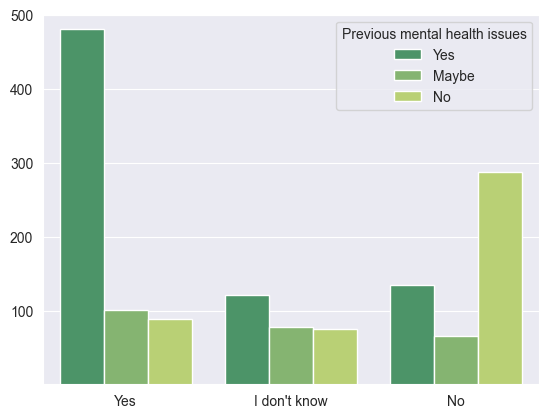

In [13]:
# Setting a subset with the two columns called new_df
new_df = df[[
    "Do you have a family history of mental illness?",
    "Have you had a mental health disorder in the past?"
]].copy()

# Plotting the bar plot using seaborn
sns.countplot(
    x="Do you have a family history of mental illness?",
    hue="Have you had a mental health disorder in the past?",
    palette="summer",
    order=["Yes", "I don't know", "No"],
    data=new_df)

# Setting labels and legend
plt.xlabel("")
plt.ylabel("")
plt.ylim(1, 500)
plt.legend(title="Previous mental health issues")

# Saving the figure
plt.savefig(f'{path}/assets/Fig6.png')

# Showing the chart
plt.show()

While __575__ employees know they have mental health disorder and __531__ others suspects having them, we want to explore the most frequent mental health disorders.

In [14]:
# Define a new helping function
def conditions_counter(column_name):
    """
    :param column_name: The name of column desired
    :return: a Dataframe containing the conditions and the number of their occurrences in the column
    """

    # Creating the list of unique values excluding empty values
    a_list = pd.DataFrame(df[column_name].value_counts()).reset_index().iloc[:, 0].to_list()

    # Creating an empty dictionary
    a_dict = dict()

    # Initiating a for-loop
    for element in a_list:
        # Inspecting the existence of a character 
        if '|' in element:
            elements = element.split("|")
            # If the condition is met
            for unit in elements:
                # Iterating each unit  
                if unit in a_dict:
                    a_dict[unit] += 1  # Augment the number if it does exist
                else:
                    a_dict[unit] = 1  # Set the number to 1 if a new occurrence is found
        else:
            if element in a_dict:
                a_dict[element] += 1
            else:
                a_dict[element] = 1

    # Turning the data stored in the dictionary into a dataframe
    dframe = pd.DataFrame(list(a_dict.items()), columns=['Condition', 'Count'])

    # The final output of the function
    return dframe

In [15]:
# Setting the dataframes
known_conditions = conditions_counter("If yes, what condition(s) have you been diagnosed with?")
suspected_conditions = conditions_counter("If maybe, what condition(s) do you believe you have?")
diagnosed_conditions = conditions_counter("If so, what condition(s) were you diagnosed with?")

# Merging the data frames into conditions_df
conditions_df = pd.merge(
    pd.merge(
        known_conditions,
        suspected_conditions,
        on='Condition', how='outer',
        suffixes=('_known', '_suspected')
    ), diagnosed_conditions, on='Condition', how='outer')

# Replacing empty values
conditions_df[['Count_known', 'Count_suspected', 'Count']] = conditions_df[
    ['Count_known', 'Count_suspected', 'Count']].replace(np.nan, 0)

# Adjusting the data type
conditions_df[['Count_known', 'Count_suspected', 'Count']] = conditions_df[
    ['Count_known', 'Count_suspected', 'Count']].astype('int64')

# Adding a new column called: Total
conditions_df["Total"] = conditions_df["Count_known"] + conditions_df["Count_suspected"] + conditions_df["Count"]
conditions_df.sort_values("Total", ascending=False, inplace=True)

# Renaming te columns for better clarity 
conditions_df.columns = ["Conditions", "Known", "Suspected", "Diagnosed_by_professional", "Total"]

# Print conditions
conditions_df

,Conditions,Known,Suspected,Diagnosed_by_professional,Total
26,"Mood Disorder (Depression, Bipolar Disorder, etc)",76,54,68,198
2,"Anxiety Disorder (Generalized, Social, Phobia,...",71,53,55,179
8,Attention Deficit Hyperactivity Disorder,38,27,29,94
33,Post-traumatic Stress Disorder,37,15,35,87
31,"Personality Disorder (Borderline, Antisocial, ...",26,27,22,75
27,Obsessive-Compulsive Disorder,26,19,21,66
39,Stress Response Syndromes,24,24,12,60
40,Substance Use Disorder,25,13,22,60
1,Addictive Disorder,25,19,13,57
20,"Eating Disorder (Anorexia, Bulimia, etc)",17,6,15,38


With over __800__ respondents having already sought treatment for mental health disorders, we want to investigate its interference in productivity.

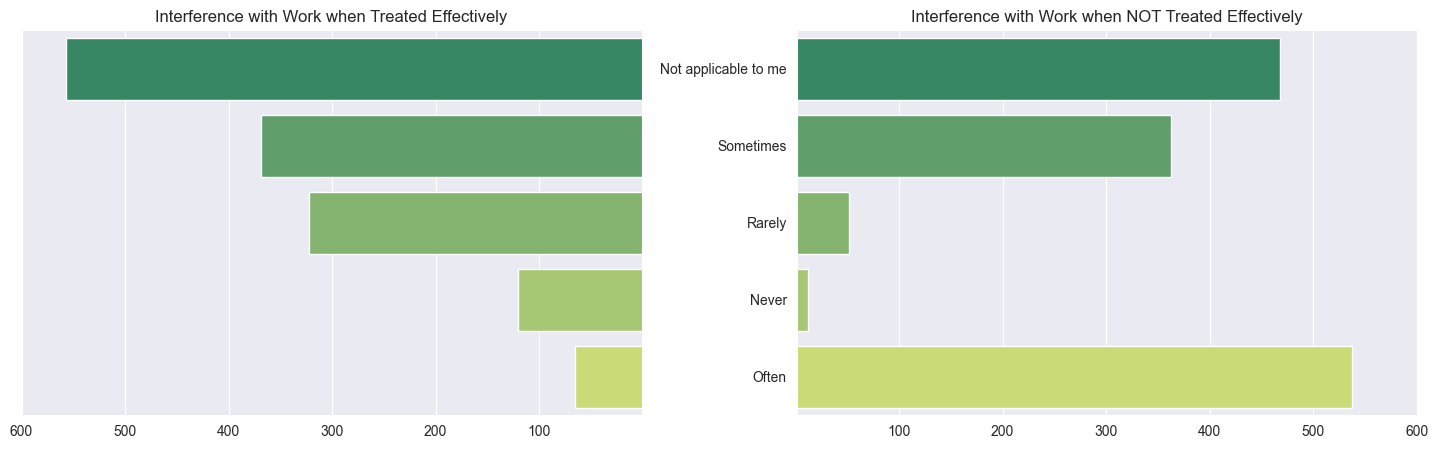

In [16]:
# Setting the dataframes
is_affected = pd.DataFrame(df["If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?"].value_counts()).reset_index()
is_not_affected = pd.DataFrame(df["If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"].value_counts()).reset_index()

# Setting the columns names
is_affected.columns = is_not_affected.columns = ["Categories", "Count"]

# Gathering the categories
categories_available = list(is_affected.Categories.unique())

# Create a subplot with two columns and one row and adjusting their width space
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
plt.subplots_adjust(wspace=0.25)

# Plot the 1st plot
sns.barplot(data=is_affected, y='Categories', x='Count', palette='summer', ax=axes[0], order=categories_available)
axes[0].set_title("Interference with Work when Treated Effectively")
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_xlim(1, 600)

# Plot the 2nd plot
sns.barplot(data=is_not_affected, y='Categories', x='Count', palette='summer', ax=axes[1], order=categories_available)
axes[1].set_title("Interference with Work when NOT Treated Effectively")
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xlim(1, 600)

# Inverting the x-axis and deleting the labels of the 1st plot 
axes[0].invert_xaxis()
axes[0].set_yticklabels([])

# Save the plot as a picture by specifying the file name and format
plt.savefig(f'{path}/assets/Fig7')

# Show the plot
plt.show()

Eariler on, we saw some unusual entries for the age column.

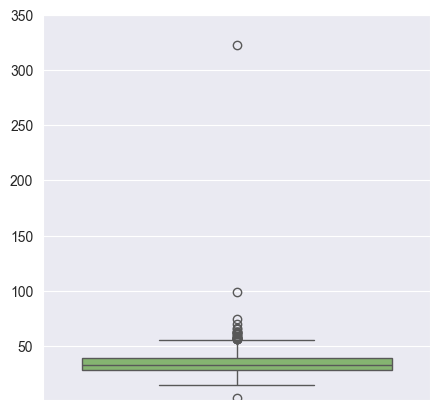

In [17]:
# Create a vertical box plot for the numerical column with outliers
plt.figure(figsize=(5, 5))
ax = sns.boxplot(y='What is your age?', data=df, palette='summer')

# Setting the title and the y-axis label
plt.ylabel('')

# Set y-axis limits and omit the first 0
ax.set_ylim(1, 350)

# Save the plot as a picture by specifying the file name and format
plt.savefig(f'{path}/assets/Fig8.png')

# Displaying the figure
plt.show()

The same thing applies to the gender column, where having more than _3_ unique values is unusual we have __70__.

In [18]:
# Counting unique values
df["What is your gender?"].value_counts()

What is your gender?
Male           610
male           249
Female         153
female          95
M               86
              ... 
cis male         1
Human            1
Genderfluid      1
Enby             1
MALE             1
Name: count, Length: 70, dtype: int64

In [19]:
work_country = df["What country do you work in?"].value_counts().reset_index()
work_country

,What country do you work in?,count
0,United States of America,851
1,United Kingdom,183
2,Canada,74
3,Germany,58
4,Netherlands,47
5,Australia,34
6,Sweden,20
7,Ireland,15
8,France,14
9,Switzerland,10


In [20]:
# Getting the dataframes
work_country = df["What country do you work in?"].value_counts().reset_index()
residence_country = df["What country do you live in?"].value_counts().reset_index()
work_country.columns = residence_country.columns = ["Country", "Count"]

# 
countries = pd.merge(work_country, residence_country, on='Country', how='outer', suffixes=('_work', '_residency'))

# Drop empty values
countries.dropna(inplace=True)

# Set types to integer
countries[["Count_work", "Count_residency"]] = countries[["Count_work", "Count_residency"]].astype("int64")

# 
countries

,Country,Count_work,Count_residency
0,Afghanistan,2,2
2,Argentina,1,1
3,Australia,34,35
4,Austria,4,4
5,Bangladesh,1,1
6,Belgium,5,5
7,Bosnia and Herzegovina,2,2
8,Brazil,10,10
9,Brunei,1,1
10,Bulgaria,7,7


We didn't get to see the exact description of the employees roles

In [21]:
# applying the helping functions on the roles column
roles = conditions_counter("Which of the following best describes your work position?")
roles

,Condition,Count
0,Back-end Developer,174
1,Front-end Developer,142
2,Other,59
3,Supervisor/Team Lead,113
4,DevOps/SysAdmin,104
5,One-person shop,76
6,Executive Leadership,50
7,Support,94
8,Dev Evangelist/Advocate,56
9,Designer,72


In [22]:
# Getting the counts of the unique categorises 
df["Do you work remotely?"].value_counts()

Do you work remotely?
Sometimes    757
Always       343
Never        333
Name: count, dtype: int64

## Summary

In this notebook, we discussed the following aspects :
- Aspect n1
- Aspect n2
- Aspect n3 

## Author
<a href="https://www.linkedin.com/in/ab0858s/">Abdelali BARIR</a> is a former veteran in the Moroccan's Royal Armed Forces, and a self-taught data scientist. Currently enrolled in B.Sc. Data Science in __IU International University of Applied Sciences__.

## Change Log
| Date       | Version | Changed By     | Change Description      |
|------------|---------|----------------|-------------------------|
| 2024-03-10 | 1.0     | Abdelali Barir | Modified markdown       |
|------------|---------|----------------|-------------------------|